In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [2]:
arr = np.array([[.65, .185, .1, .1],
       [.26, .109, .039, .06],
       [.925, .3, .077, .169]])
arr = arr.T
df = pd.DataFrame(arr, columns=["H", "j", "c"], index=["E1", "E2", "E3", "E4"])
df

,H,j,c
E1,0.650,0.260,0.925
E2,0.185,0.109,0.300
E3,0.100,0.039,0.077
E4,0.100,0.060,0.169


In [21]:
# Descripción del dataframe
df.describe()

,H,j,c
count,4.000000,4.000000,4.000000
mean,0.258750,0.117000,0.367750
std,0.263893,0.099743,0.382603
min,0.100000,0.039000,0.077000
25%,0.100000,0.054750,0.146000
50%,0.142500,0.084500,0.234500
75%,0.301250,0.146750,0.456250
max,0.650000,0.260000,0.925000


In [19]:
# Nivel de Correlación entre las columnas del dataframe
df.corr()

,H,j,c
H,1.000000,0.987406,0.992836
j,0.987406,1.000000,0.997818
c,0.992836,0.997818,1.000000


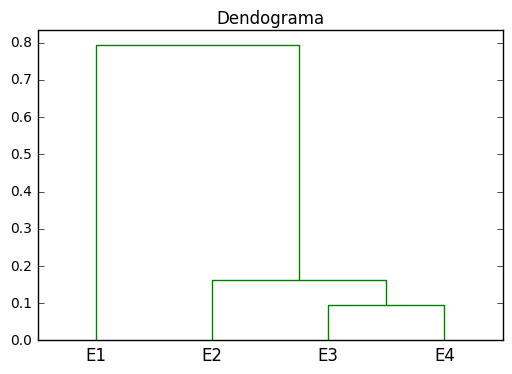

In [22]:
def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

#     if not kwargs.get('no_plot', False):
#         for i, d in zip(ddata['icoord'], ddata['dcoord']):
#             x = 0.5 * sum(i[1:3])
#             y = d[1]
#             plt.plot(x, y, 'ro')
#             plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
#                          textcoords='offset points',
#                          va='top', ha='center')

    return ddata

linkage_matrix = linkage(arr, "single")

plt.figure()#1, 2, 1)

# ddata = augmented_dendrogram(linkage_matrix,
ddata = dendrogram(linkage_matrix,
                             labels=["E1", "E2", "E3", "E4"],
                             color_threshold=1,
                             p=6,
                             truncate_mode=None
            #                truncate_mode='lastp'
                           )
plt.title("Dendograma")

plt.show()

## Distancias

In [18]:
dist_df = pd.DataFrame(columns=df.index)
for i, a in enumerate(arr):
    dist = [np.linalg.norm(a-x) for x in arr]
    dist_df.loc[i] = dist
#     print(a, dist)
dist_df.index = df.index
dist_df

,E1,E2,E3,E4
E1,0.000000,0.793506,1.034623,0.956052
E2,0.793506,0.000000,0.248705,0.163667
E3,1.034623,0.248705,0.000000,0.094366
E4,0.956052,0.163667,0.094366,0.000000


### Por si necesitas las distancias despues de unidas las estaciones... (>_<)

In [32]:
distancias_combinadas = linkage(df, "single")
ac_cols = [x for x in range(len(dist_df.columns))]
for c1, c2, dis, x in distancias_combinadas:
    n = len(ac_cols)+1
    print("Dist: E{}-E{} = {} (hereinafter, E{})".format(int(c1+1), int(c2+1), dis, n))
    ac_cols.append(n)

Dist: E3-E4 = 0.09436630754670866 (hereinafter, E5)
Dist: E2-E5 = 0.16366734555188459 (hereinafter, E6)
Dist: E1-E6 = 0.793505513528419 (hereinafter, E7)
